According to the information provided, Bigmart is a big supermarket chain, with stores all around the country and its 
current board set out a challenge to all Data Scientist out there to help them create a model that can predict the
sales, per product, for each store. BigMart has collected sales data from the year 2013, for 1559 products across 
10 stores in different cities. With this information the corporation hopes we can identify the products and stores 
which play a key role in their sales and use that information to take the correct measures to ensure success of their business.

# Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
train = pd.read_csv("data/Train.csv") 
test = pd.read_csv("data/Test.csv")
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


If we look at variable Item_Identifier , we can see different group of letters per each product such as ‘FD’ (Food), ‘DR’(Drinks) and ‘NC’ (Non-Consumable).
On the other hand, regarding Item_Visibility there are items with the value zero . This does not make lot of sense,
since this is indicating those items are not visible on the store.

In [2]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Renaming columns as they have very long names

In [3]:
train.rename(columns = {'Outlet_Identifier':'Storeid','Outlet_Establishment_Year':'Store_Est_Year','Outlet_Size':'Store_size',
                        'Outlet_Location_Type':'Store_location','Outlet_Type':'Store_type','Item_Outlet_Sales':'Sales'}, inplace = True) 


In [4]:
test.rename(columns = {'Outlet_Identifier':'Storeid','Outlet_Establishment_Year':'Store_Est_Year','Outlet_Size':'Store_size',
                        'Outlet_Location_Type':'Store_location','Outlet_Type':'Store_type','Item_Outlet_Sales':'Sales'}, inplace = True) 


In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Storeid,Store_Est_Year,Store_size,Store_location,Store_type,Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<h3>1.1. Univariate Analysis</h3>
<br>
To get an idea of the distribution of numerical variables, histograms 
are an excellent starting point.
Let’s begin by generating one for Item_Outlet_Sales, our target variable.
<h3>1.1.1. Distribution of the target variable: Sales</h3>

Text(0.5, 1.0, 'Sales Distribution')

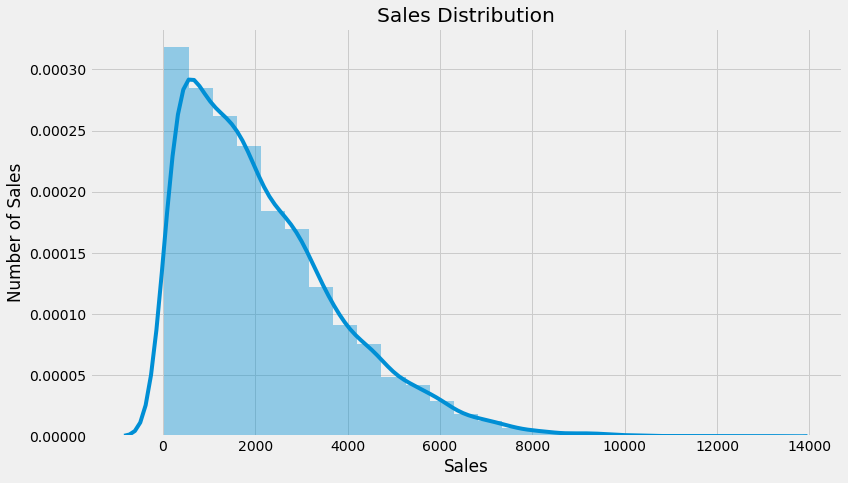

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Sales")
plt.ylabel("Number of Sales")
plt.title("Sales Distribution")


We can see that our target variable is skewed to the right, towards the higher sales, 
with higher concentration on lower sales.

<h3>1.1.2.1. Correlation between Numerical Predictors and Target variable</h3>


In [8]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Store_Est_Year,Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Store_Est_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [9]:
corr = train.corr()

print (corr['Sales'].sort_values(ascending=False))

Sales              1.000000
Item_MRP           0.567574
Item_Weight        0.014123
Store_Est_Year    -0.049135
Item_Visibility   -0.128625
Name: Sales, dtype: float64


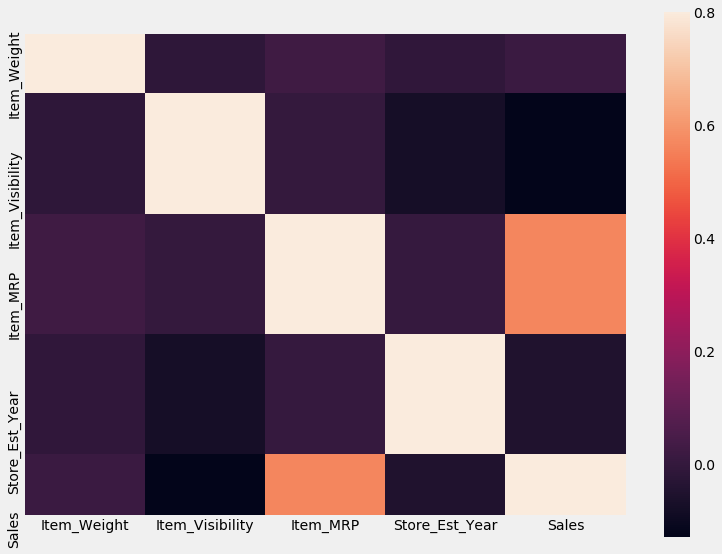

In [10]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

From the current numeric variables we can observe that the Item_Visibility is the feature 
with the lowest correlation with our target variable.
Therefore, the less visible the product is in the store the higher the price will be.
This is curious since from the initial assumptions this variables was expected to have 
high impact in the sales increase. Nevertheless, since this is not an expected behaviour 
and we should investigate. Moreover, this feature has a negative correlation with all of the other features.
Furthermore, the most positive correlation belongs to Item_MRP .

<h3>1.1.3. Categorical Predictors</h3>
<br>
For categorical variables, bar charts and frequency counts are the natural counterparts to histograms. 
Now is time to look at the variables that contain some insight on the assumptions previously made.
<h3>1.1.3.1. Distribution of the variable Item_Fat_Content</h3>
<br>
For Item_Fat_Content there are two possible choices : “Low Fat” or “Regular”. 
    However, in our data we have these two types of Fat writen in different manners. This must be corrected.

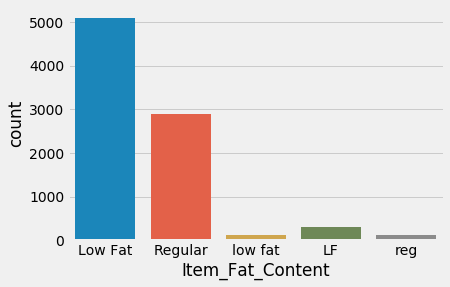

In [21]:
sns.countplot(train.Item_Fat_Content)


<h3>1.1.3.2. Distribution of the variable Item_Type</h3>
<br>
Looking at the list of Item_Type we see there are sixteen different types. 
This is a high number of unique values for a categorical variable.
Therefore we must try to think of a way to drastically reduce this number.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

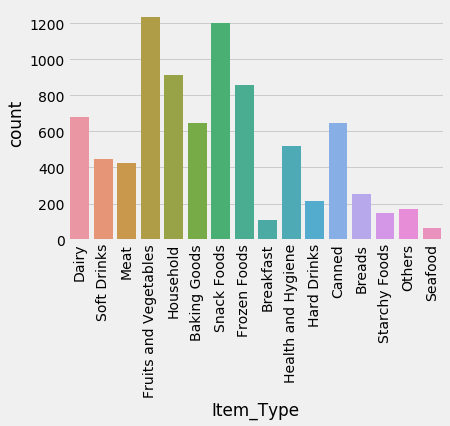

In [22]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

<h3>1.1.3.3. Distribution of the variable store_Size</h3>
<br>
There seems to be a low number of stores with size equals to “High”. 
Most of the existent stores seem to be either “Small” or “Medium”. 
It will be interesting to see how this variable relates to our target. 
If “High” size stores have better results as initially expected or due to
this number distribution sales results might be similar.


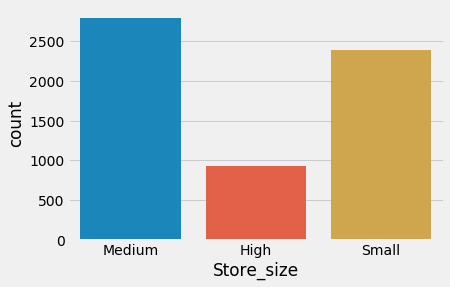

In [25]:
sns.countplot(train.Store_size)

<h3>1.1.3.4. Distribution of the variable Store_Location</h3>
<br>
Bigmart appears to be a supermarket brand that is more present in “Small” to “Medium”
size cities than in more densily populated locations.


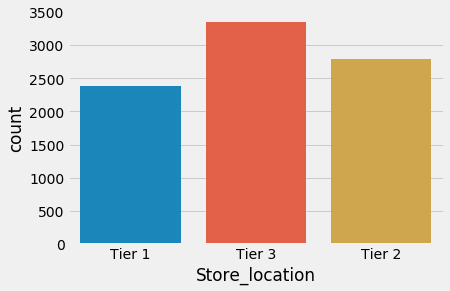

In [27]:
sns.countplot(train.Store_location)

<h3>1.1.3.5. Distribution of the variable Store_Type</h3>
<br>
It looks like Supermarket Type2 , Grocery Store and Supermarket Type3 
all have low expression in this distribution. Maybe we can create a
single category with all of the three. Nevertheless, before doing this we must see their impact in the Sales .


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

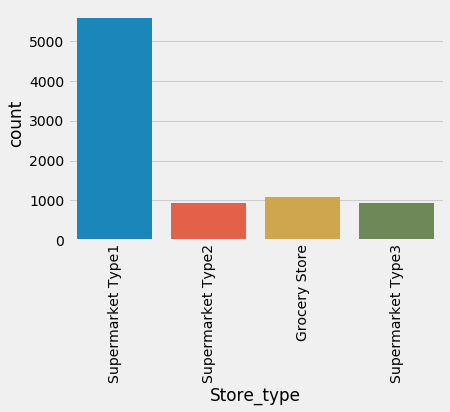

In [30]:
sns.countplot(train.Store_type)
plt.xticks(rotation=90)


<h3>1.2. Bivariate Analysis</h3>
<br>
Firstly we individually analysed some of the existent features, now 
it is time to understand the relationship between our target variable and 
predictors as well as the relationship among predictors.
<br>
<h3>1.2.1.1. Item_Weight and Sales analysis</h3>
<br>
We saw previously that Item_Weight had a low correlation with our target variable. If we plot both features we can see that relationship.



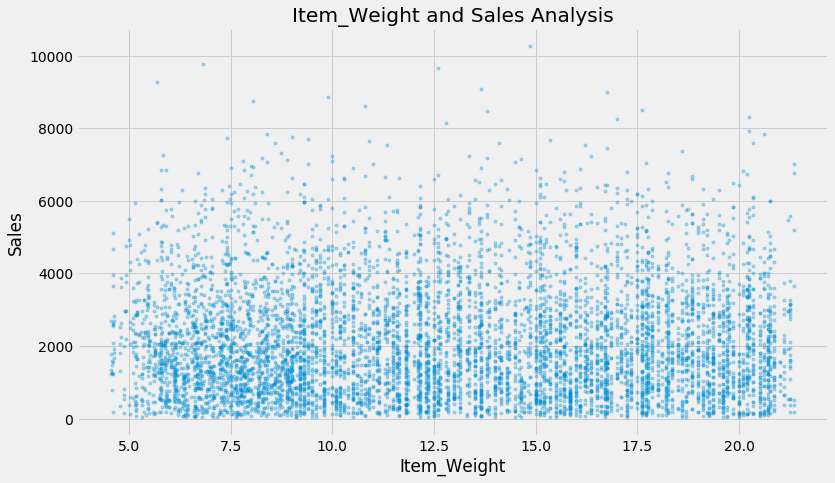

In [11]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Sales")
plt.title("Item_Weight and Sales Analysis")
plt.plot(train.Item_Weight, train["Sales"],'.', alpha = 0.3)

<h3>1.2.1.2. Item_Visibility and Sales analysis</h3>
<br>
Visibility in Store: The location of product in a store will impact sales.
Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
This was the assumption made… however, first the correlation and now this plot chart, indicate
that the more visible a product is the less higher its sales will be. This might be due to the fact that a great number of daily use products, which do not need high visibility, control the top of the sales chart. As we can see from the bar charts below, most sold products have lower visibility. Furthermore, there is a concerning number of products with visibility zero.


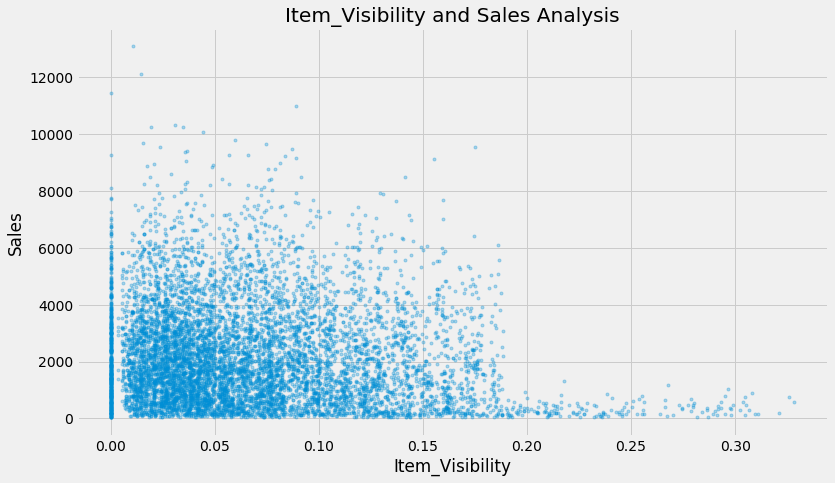

In [12]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Sales")
plt.title("Item_Visibility and Sales Analysis")
plt.plot(train.Item_Visibility, train["Sales"],'.', alpha = 0.3)

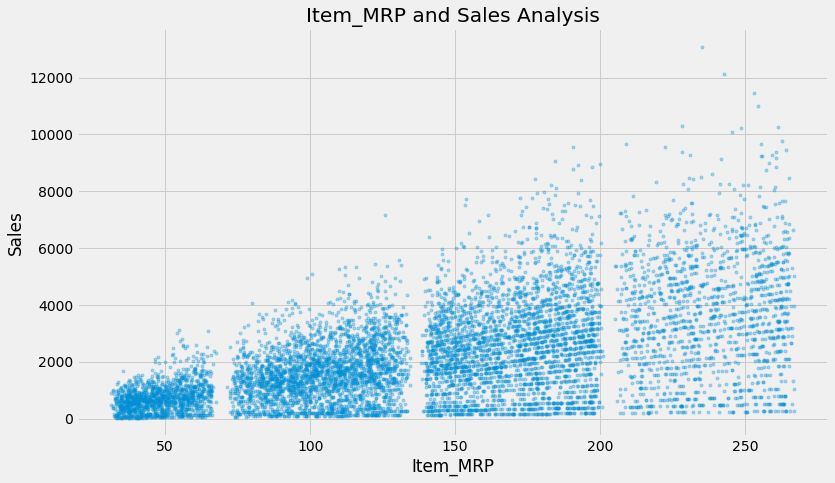

In [13]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Sales")
plt.title("Item_MRP and Sales Analysis")
plt.plot(train.Item_MRP, train["Sales"],'.', alpha = 0.3)

<h3>1.2.1.3. Store_ESt_Year and Sales analysis</h3>
<br>
There seems to be no significant meaning between the year of store establishment and the sales for the items. 1998 has low values but thet might be due to the fact the few stores opened in that year.


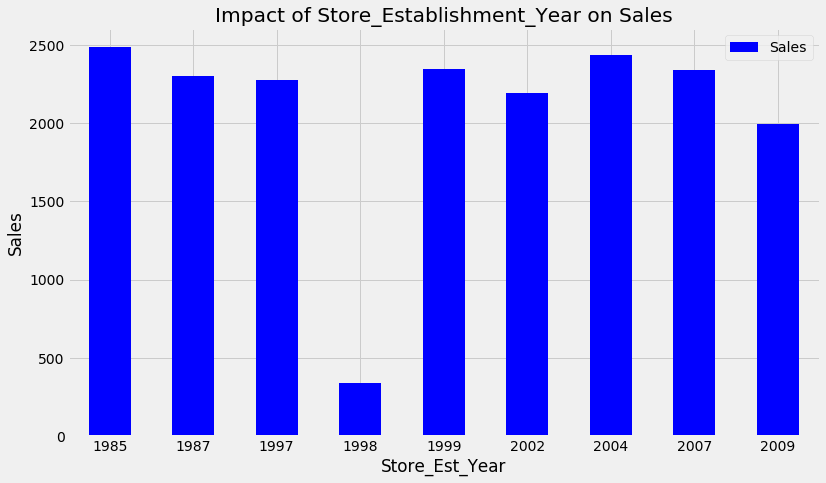

In [14]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Store_Est_Year', values="Sales", aggfunc=np.mean)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Store_Est_Year")
plt.ylabel("Sales")
plt.title("Impact of Store_Establishment_Year on Sales")
plt.xticks(rotation=0)
plt.show()

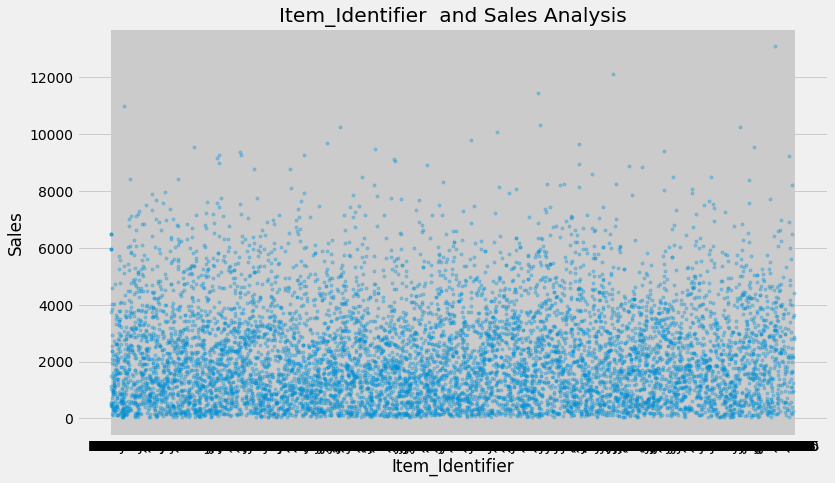

In [51]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Identifier")
plt.ylabel("Sales")
plt.title("Item_Identifier  and Sales Analysis")
plt.plot(train.Item_Identifier , train["Sales"],'.', alpha = 0.3)

<h3>1.2.2. Categorical Variables</h3>
<br>
<h3>1.2.2.1. Impact of Item_Fat_Content on Sales</h3>
<br>
Daily use products should have a higher tendency to sell as compared to the specific use products. “Low Fat” products seem to have higher sales values than “Regular” products.


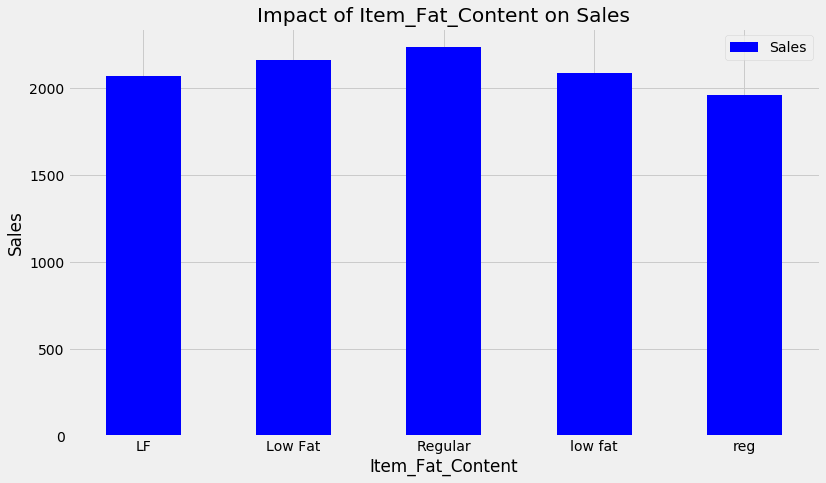

In [49]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Sales", aggfunc=np.mean)

Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Sales")
plt.title("Impact of Item_Fat_Content on Sales")
plt.xticks(rotation=0)
plt.show()

<h3>1.2.2.2. Impact of Store_ID on Sales</h3>


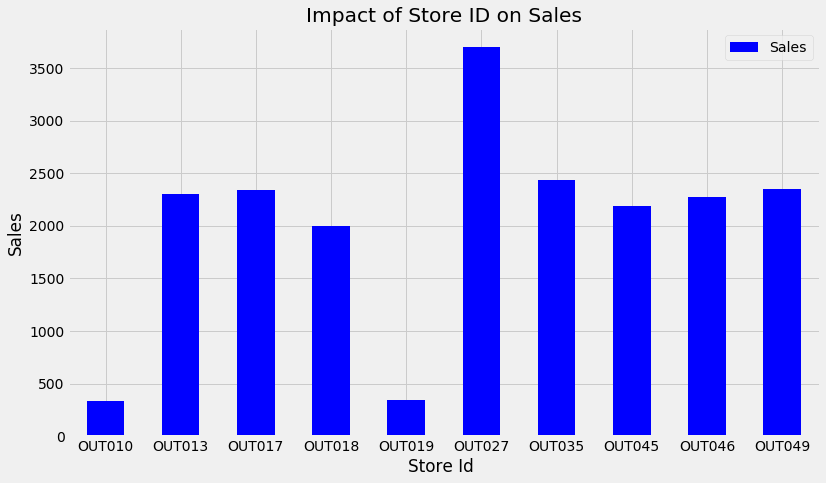

In [53]:
Storeid_pivot = \
train.pivot_table(index='Storeid', values="Sales", aggfunc=np.mean)

Storeid_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Store Id ")
plt.ylabel("Sales")
plt.title("Impact of Store ID on Sales")
plt.xticks(rotation=0)
plt.show()

From the ten stores, two are Groceries whereas six are Supermarket Type1, one Supermarket Type2 and one Supermarket Type3. You can get this information from the pivot_tables below.
From the above bar chart, we see that thr groceries (“OUT010”, “OUT019”) have the lowest sales results which is expected followed by the Supermarket Type 2 (“OUT018”). Curiously, most stores are of type Supermarket Type1 of size “High” and do not have the best results. The best results belong to “Out027” which is a “Medium” size Supermarket Type 3.


In [55]:
train.pivot_table(values='Store_type', columns='Storeid',aggfunc=lambda x:x.mode())

Storeid,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Store_type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [56]:
train.pivot_table(values='Store_type', columns='Store_size',aggfunc=lambda x:x.mode())

Store_size,High,Medium,Small
Store_type,Supermarket Type1,Supermarket Type3,Supermarket Type1


<h3>1.2.2.3. Impact of Store_Size on Sales</h3>
<br>
In the beginning, our belief was that stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place. According to the results, this is almost the case. Curiously, consumers tend to prefer medium size stores instead of big size. As we saw in the previous section, most stores have size “Medium” but still the “High” and “Small” stores which are clearly in an inferior number can beat or even come close to their numbers.


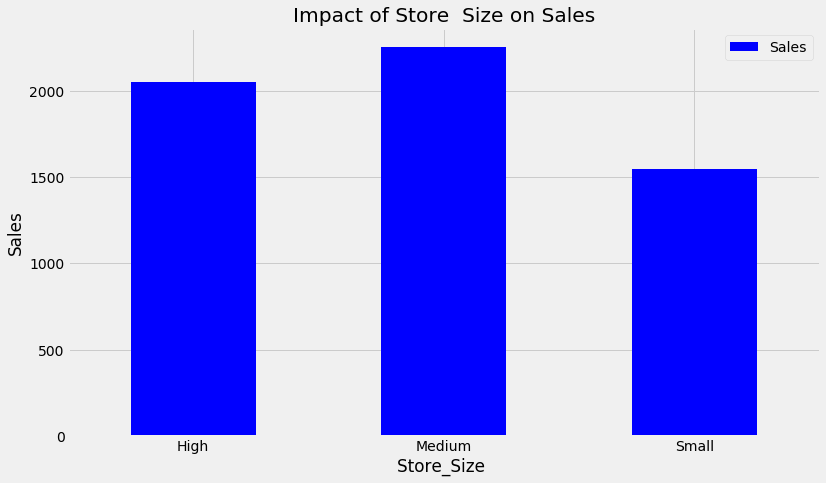

In [58]:
storesize_pivot = \
train.pivot_table(index='Store_size', values="Sales", aggfunc=np.median)

storesize_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Store_Size ")
plt.ylabel("Sales")
plt.title("Impact of Store  Size on Sales")
plt.xticks(rotation=0)
plt.show()

<h3>1.2.2.4. Impact of store_Type on Sales</h3>
<br>
From this analysis possibly it would be a good idea to creat a new feature that shows the sales ratio according to the store size.


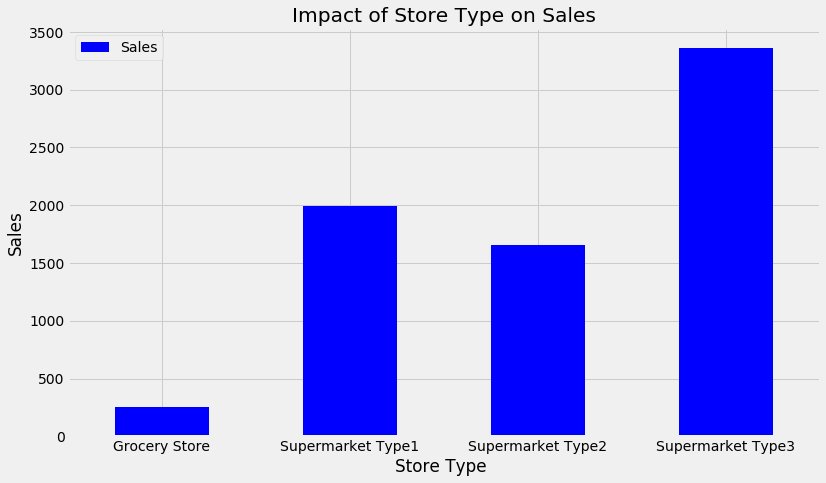

In [60]:
storetype_pivot = \
train.pivot_table(index='Store_type', values="Sales", aggfunc=np.median)

storetype_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Store Type ")
plt.ylabel("Sales")
plt.title("Impact of Store Type on Sales")
plt.xticks(rotation=0)
plt.show()

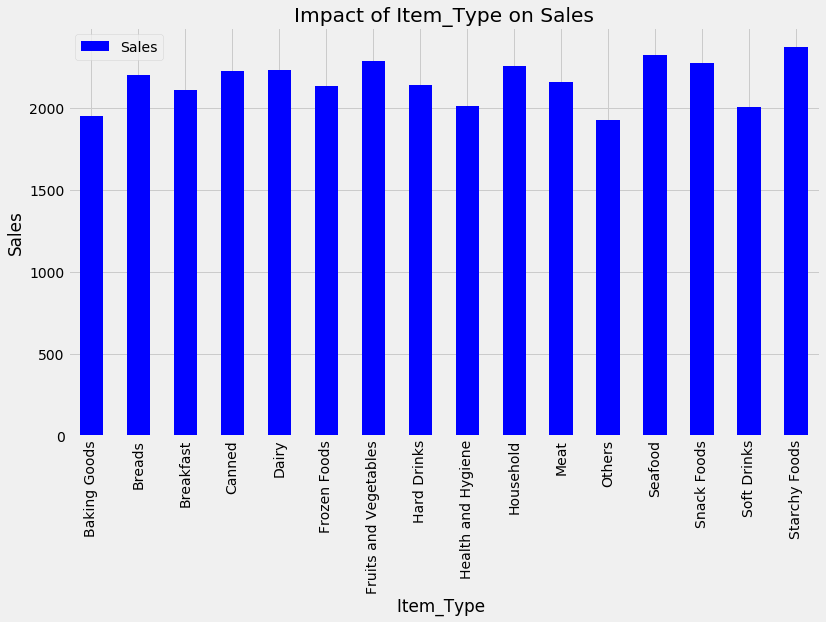

In [61]:
pivoTable = \
train.pivot_table(index='Item_Type', values="Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Sales")
plt.title("Impact of Item_Type on Sales")
plt.xticks(rotation=90)
plt.show()

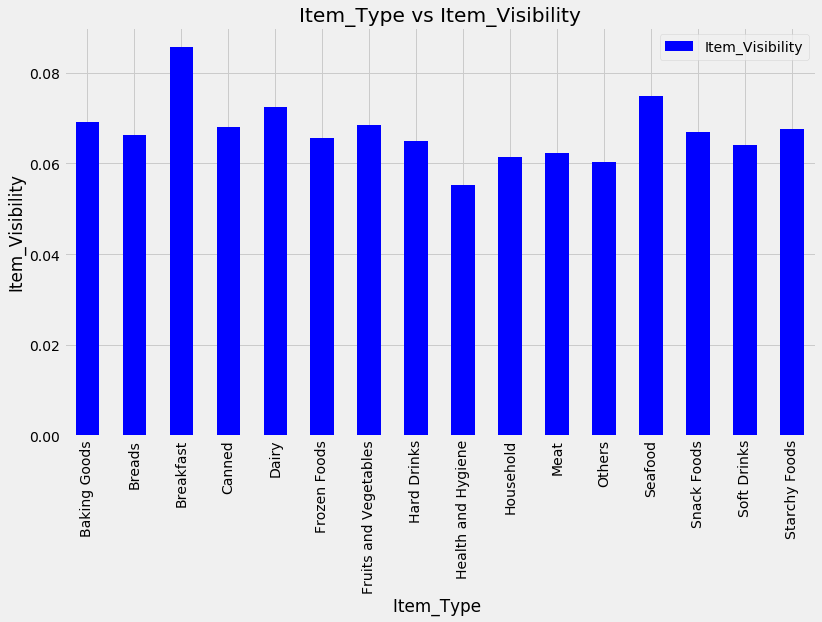

In [62]:
pivoTable = \
train.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Visibility")
plt.title("Item_Type vs Item_Visibility")
plt.xticks(rotation=90)
plt.show()

<h2>2. Data Pre-Processing</h2>
<br>
During our EDA we were able to take some conclusions regarding our first assumptions and the available data:
<ul>
<li>Regarding the variables which were thought to have high impact on the product’s sale price.</li>
<li>Item_Visibility does not have a high positive correlation as expected, quite the opposite. As well, there are no big variations in the sales due to theItem_Type . On the other hand, it was possible to see that the size, location and type of store could have a positive impact on sales.
<li>If we look at variable Item_Identifer , we can see different groups of letters per each product such as ‘FD’ (Food), ‘DR’(Drinks) and ‘NC’ (Non-Consumable). From this we can create a new variable.</li>
<li>Regarding Item_Visibility there are items with the value zero. This does not make lot of sense, since this is indicating those items are not visible on the store.</li>
<li>Similar, Item_Weight and Store_Size seem to present NaN values.</li>
<li>There seems to be 1562 unique items only available in a single store.</li>
<li>Item_Fat_Content has vale “low fat” writen in different manners.</li>
<li>For Item_Type we try to create a new feature that does not have 16 unique values.</li>
<li>Store_Esta_Year besides being a hidden category, its values vary from 1985 to 2009 . It must be converted to how old the store is to better see the impact on sales.</li>

<h3>2. 1. Looking for missing values</h3>
<br>
Usually, datasets for every challenge such as those presented in Analytics Vidhya or Kaggle come seperated as a train.csv and a test.csv. It is generally a good idea to combine both sets into one, in order to perform data cleaning and feature engineering and later divide them again. With this step we do not have to go through the trouble of repeting twice the same code, for both datasets. Let’ s combine them into a dataframe datawith a source column specifying where each observation belongs.


In [10]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True)
data.to_csv("data/data.csv",index=False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [11]:
data.isnull().sum()

Item_Fat_Content       0
Item_Identifier        0
Item_MRP               0
Item_Type              0
Item_Visibility        0
Item_Weight         2439
Sales               5681
Store_Est_Year         0
Store_location         0
Store_size          4016
Store_type             0
Storeid                0
source                 0
dtype: int64

Note that the Sales is the target variable and 39% of its values are NaN. For this case only, the missing values are the ones which belong to the test set. Remember we added the train and test datasets. So we need not worry about it.
Neverthless, we’ll impute the missing values in Item_Weight and Store_Size.


In [12]:
 #aggfunc is mean by default! Ignores NA by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


<h3>2.2.1. Imputing the mean for Item_Weight missing values</h3>


In [13]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [14]:
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [15]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Store_size', columns='Store_type',aggfunc=lambda x:x.mode())
outlet_size_mode

Store_type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Store_size,Small,Small,Medium,Medium


<h3>2.2.2. Imputing Store_Size missing values with the mode</h3>


In [16]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Store_size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

print ('Orignal #missing: %d'%sum(data['Store_size'].isnull()))
data['Store_size'] = data[['Store_size','Store_type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Store_size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


<h3>3. Feature Engineering </h3>
<br>
So we now got rid of all the missing values in our data that might negatively influence our analysis. If you remember, during our analysis we saw some nuances in the data and now is time to fix them and make our data ready for analysis.
<br>
<h3>3.2. Item_Visibility minimum value is 0</h3>
<br>
In our data exploration we saw that Item_Visibility had the minimum value 0, which makes no sense since every product must be visible to all clients. Let’s consider it as missing value and impute it with mean visibility of that product.


In [17]:
#Get all Item_Visibility mean values for respective Item_Identifier
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')
visibility_item_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [18]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 879
Final #zeros: 0


<h3>3.4. Create a broad category of Item_Type</h3>
<br>

Earlier we saw that the Item_Type variable has 16 categories which might not prove to be very useful in our analysis. So it’s a good idea to combine them. If we look closely to the Item_Identifier of each item we see that each one starts with either “FD” (Food), “DR” (Drinks) or “NC” (Non-Consumables). Therefore, we can group the items within these 3 categories


In [19]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [20]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Sales,Store_Est_Year,Store_location,Store_size,Store_type,Storeid,source,Item_Type_Combined
0,Low Fat,FDA15,249.8092,Dairy,0.016047,9.30,3735.1380,1999,Tier 1,Medium,Supermarket Type1,OUT049,train,Food
1,Regular,DRC01,48.2692,Soft Drinks,0.019278,5.92,443.4228,2009,Tier 3,Medium,Supermarket Type2,OUT018,train,Drinks
2,Low Fat,FDN15,141.6180,Meat,0.016760,17.50,2097.2700,1999,Tier 1,Medium,Supermarket Type1,OUT049,train,Food
3,Regular,FDX07,182.0950,Fruits and Vegetables,0.017834,19.20,732.3800,1998,Tier 3,Small,Grocery Store,OUT010,train,Food
4,Low Fat,NCD19,53.8614,Household,0.009780,8.93,994.7052,1987,Tier 3,High,Supermarket Type1,OUT013,train,Non-Consumable


In [21]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [22]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

<h3>4. Feature Transformations</h3>

<h3>4.1. Creating variable Item_Visibility_Mean_Ratio</h3>
<br>
In the beginning of this article we hypothesized that products that are more visible are likely to have higher sales. For example, we can create a new variable that show us the importance given to a product in a given store according to the mean of significance given to the same product in all other stores.


In [23]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()


count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

<h3>4.2. Categorical Variables — One Hot Encoding</h3>
<br>
Since scikit-learn only accepts numerical variables, we need to convert all categories of nominal variables into numeric types. Let’s start with turning all categorical variables into numerical values using LabelEncoder() (Encode labels with value between 0 and n_classes-1). After that, we can use get_dummies to generate dummy variables from these numerical categorical variables


In [24]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Outlet'] = le.fit_transform(data['Storeid'])
var_mod = ['Item_Fat_Content','Store_location','Store_size','Item_Type_Combined','Store_type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories — LowFat,Regular,Non-Edible. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers — 0 (if the category is not present) and 1(if category is present). This can be done using get_dummies function of Pandas.


In [25]:
#Dummy Variables:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Store_type','Store_size',
                              'Item_Type_Combined','Outlet'])

data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Sales                        float64
Store_Est_Year                 int64
Store_location                 int32
Storeid                       object
source                        object
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Store_type_0                   uint8
Store_type_1                   uint8
Store_type_2                   uint8
Store_type_3                   uint8
Store_size_0                   uint8
Store_size_1                   uint8
Store_size_2                   uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
O

In [26]:
data.head()

,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Sales,Store_Est_Year,Store_location,Storeid,source,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,Dairy,0.016047,9.30,3735.1380,1999,0,OUT049,train,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,Soft Drinks,0.019278,5.92,443.4228,2009,2,OUT018,train,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,Meat,0.016760,17.50,2097.2700,1999,0,OUT049,train,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,Fruits and Vegetables,0.017834,19.20,732.3800,1998,2,OUT010,train,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,Household,0.009780,8.93,994.7052,1987,2,OUT013,train,...,0,1,0,0,0,0,0,0,0,0


<h3>4.3. Exporting Data</h3>
<br>
Final step is to convert data back into train and test data sets. Its generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions. This can be achieved using following code:


In [27]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Store_Est_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("data/train_modified.csv",index=False)
test.to_csv("data/test_modified.csv",index=False)

<h3>5. Model Building</h3>


In [28]:
train_df = pd.read_csv('data/train_modified.csv')
test_df = pd.read_csv('data/test_modified.csv')

In [31]:
#Define target and ID columns:
target = 'Sales'
IDcol = ['Item_Identifier','Storeid']
from sklearn.model_selection import cross_val_score
from sklearn import metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

<h3>5.1. Linear Regression Model</h3>


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.37 | Min - 1074 | Max - 1210


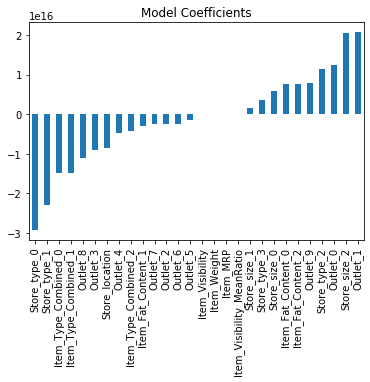

In [32]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Sales','Item_Identifier','Storeid'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

<h3>5.2. Ridge Regression Model</h3>


Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.62 | Min - 1076 | Max - 1217


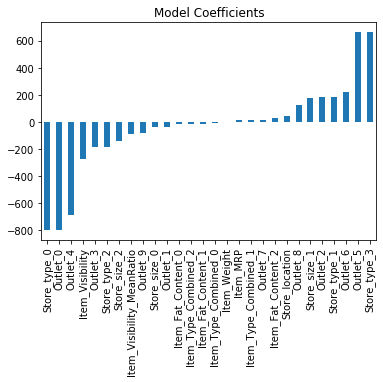

In [33]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')

coef2 = pd.Series(RR.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

<h3>5.3. Decision Tree Model</h3>


Model Report
RMSE : 1058
CV Score : Mean - 1090 | Std - 44.57 | Min - 1006 | Max - 1184


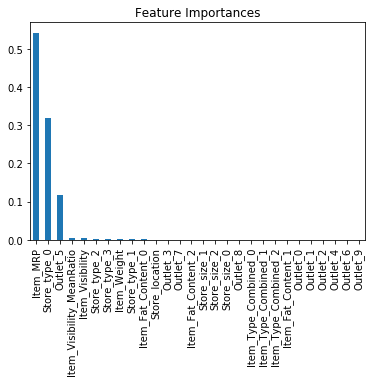

In [34]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')

coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

<h3>5.4. Random Forrest Model</h3>


Model Report
RMSE : 1069
CV Score : Mean - 1096 | Std - 42.97 | Min - 1026 | Max - 1180


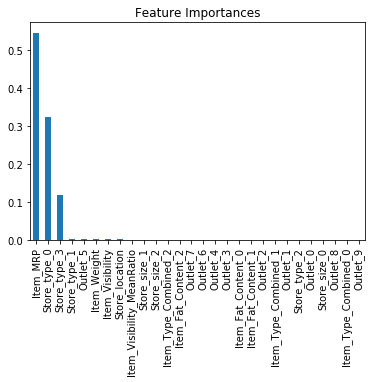

In [35]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

In [37]:
import sys
!{sys.executable} -m pip install xgboost

<h3>5.5. XGBoost Model</h3>

In [38]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)



XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [39]:
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])

# make predictions
predictions = my_model.predict(test_df[predictors])


In [40]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

Mean Absolute Error : 139.69533288362243
RMSE : 991.1


The ML algorithm that perform the best was XGBoost with RMSE = 991 .
